## HAR_Prediction

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data
train = pd.read_csv('UCI HAR Dataset/CSV/train.csv')
test = pd.read_csv('UCI HAR Dataset/CSV/test.csv')
print(train.shape,test.shape)

(7352, 564) (2947, 564)


In [3]:
train.head()

,1 tBodyAccmeanX,2 tBodyAccmeanY,3 tBodyAccmeanZ,4 tBodyAccstdX,5 tBodyAccstdY,6 tBodyAccstdZ,7 tBodyAccmadX,8 tBodyAccmadY,9 tBodyAccmadZ,10 tBodyAccmaxX,...,555 angletBodyAccMeangravity,556 angletBodyAccJerkMeangravityMean,557 angletBodyGyroMeangravityMean,558 angletBodyGyroJerkMeangravityMean,559 angleXgravityMean,560 angleYgravityMean,561 angleZgravityMean,subject,Activites,Activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


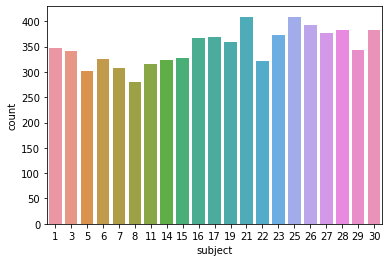

In [4]:
#count of activities of the 30 persons
sns.countplot(x=train['subject'], data=train)
plt.rcParams['font.family']='DejavU Sans'

In [5]:
X_train = train.drop(['subject','Activites','Activity_name'],axis=1)
y_train = train.Activity_name

In [6]:
X_test = test.drop(['subject','Activites','Activity_name'], axis=1)
y_test = test.Activity_name

In [7]:
print('X_train and X_test shape:({},{})'.format(X_train.shape,X_test.shape))
print('y_train and y_test shape:({},{})'.format(y_train.shape,y_test.shape))

X_train and X_test shape:((7352, 561),(2947, 561))
y_train and y_test shape:((7352,),(2947,))


In [8]:
#labels for the confusion_matrix
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Linear regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(n_jobs =-1)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy score on logistic regression:",accuracy_score(y_test, y_pred))

Accuracy score on logistic regression: 0.9582626399728538


In [ ]:
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))

Confusion matrix 
 [[537   0   0   0   0   0]
 [  0 431  57   0   0   3]
 [  0  17 515   0   0   0]
 [  0   0   0 493   2   1]
 [  0   0   0   4 403  13]
 [  0   0   0  25   1 445]]


In [ ]:
print("Classfication Report\n:",classification_report(y_test, y_pred))

Classfication Report
:                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.98       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



##### Grid Search- logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
params = {'penalty':['l1','l2'],'C':[10**x for x in range(-4,5,1)]}
model = GridSearchCV(LogisticRegression(n_jobs=-1),param_grid=params, cv=6, scoring='accuracy',return_train_score=True )
model.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [24]:
model.best_params_

{'C': 10, 'penalty': 'l2'}

In [ ]:
train_pred = model.best_estimator_.predict(X_train)
test_pred = model.best_estimator_.predict(X_test)
# print("Accuracy score on logistic regression:",accuracy_score(y_test, y_pred_grid))

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy on train set",accuracy_score(y_train, train_pred))
print("Accuracy on test set",accuracy_score(y_test, test_pred))

Accuracy on train set 0.9953754080522307
Accuracy on test set 0.9623345775364778


In [27]:
# mean average score of the cross-validation
print("Best Score ({})".format(model.best_score_))

Best Score (0.9502176278563657)


### Linear SVM

In [18]:
from sklearn.svm import LinearSVC
linear = LinearSVC()
linear.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred = linear.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
print("Accuracy score on logistic regression:",accuracy_score(y_test, y_pred))

Accuracy score on logistic regression: 0.9660671869697998


In [21]:
confusion_matrix(y_test, y_pred)

array([[537,   0,   0,   0,   0,   0],
       [  2, 426,  59,   0,   0,   4],
       [  0,  10, 521,   1,   0,   0],
       [  0,   0,   0, 496,   0,   0],
       [  0,   0,   0,   2, 413,   5],
       [  0,   0,   0,  17,   0, 454]])

In [22]:
print("Classfication Report\n:",classification_report(y_test, y_pred))

Classfication Report
:                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



##### Grid-search Linear svm

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

In [10]:
params = {'C':[0.125, 0.5, 1, 2, 8, 16]}
model_svm = GridSearchCV(LinearSVC(),param_grid=params, return_train_score=True, cv = 15, scoring='accuracy', verbose=1)
model_svm.fit(X_train,y_train)

Fitting 15 folds for each of 6 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  5.8min finished


GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.125, 0.5, 1, 2, 8, 16]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [11]:
model_svm.best_params_

{'C': 0.5}

In [12]:
model_svm.best_estimator_

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
y_pred_svm = model_svm.best_estimator_.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy on test set: {}".format(accuracy_score(y_test, y_pred_svm)))

Accuracy on test set: 0.9670851713607058


In [15]:
confusion_matrix(y_test, y_pred_svm)

array([[537,   0,   0,   0,   0,   0],
       [  2, 430,  56,   0,   0,   3],
       [  0,  10, 521,   1,   0,   0],
       [  0,   0,   0, 496,   0,   0],
       [  0,   0,   0,   3, 412,   5],
       [  0,   0,   0,  17,   0, 454]])

In [16]:
print("classication_report is:\n",classification_report(y_test, y_pred_svm))

classication_report is:
                     precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [17]:
print("Best score {}".format(model_svm.best_score_))

Best score 0.9606909684439608


### Kernel SVM

In [9]:
from sklearn.svm import SVC
model_kernel = SVC()
model_kernel.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
y_pred_kernel = model_kernel.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy on test set: ",accuracy_score(y_test, y_pred_kernel))

Accuracy on test set:  0.9504580929759077


In [13]:
print(confusion_matrix(y_test, y_pred_kernel))

[[537   0   0   0   0   0]
 [  0 438  51   0   0   2]
 [  0  29 503   0   0   0]
 [  0   0   0 488   3   5]
 [  0   0   0  10 384  26]
 [  0   0   0  20   0 451]]


#### Grid Search

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [15]:
params =  {'C':[-8,-2,0,1,2,8,16],'gamma': [ 0.0078125, 0.125, 2,]}
model_svc = GridSearchCV(SVC(kernel='rbf'), param_grid=params, scoring='accuracy', cv= 6, n_jobs=-1,return_train_score=True,verbose=1 )
model_svc.fit(X_train, y_train)

Fitting 6 folds for each of 21 candidates, totalling 126 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 126 out of 126 | elapsed: 64.6min finished


GridSearchCV(cv=6, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [-8, -2, 0, 1, 2, 8, 16],
                         'gamma': [0.0078125, 0.125, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [16]:
y_pred_svc = model_svc.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy on test set: ",accuracy_score(y_test, y_pred_svc))

Accuracy on test set:  0.9626739056667798


In [18]:
print(confusion_matrix(y_test, y_pred_svc))

[[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



### Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
rndm = RandomForestClassifier(n_jobs=-1)
rndm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [11]:
y_pred_rndm = rndm.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
print("Accuracy on test set is: ",accuracy_score(y_test, y_pred_rndm))

Accuracy on test set is:  0.9260264675941635


In [13]:
print(confusion_matrix(y_test, y_pred_rndm))

[[537   0   0   0   0   0]
 [  0 435  56   0   0   0]
 [  0  43 489   0   0   0]
 [  0   0   0 482  10   4]
 [  0   0   0  21 355  44]
 [  0   0   0  34   6 431]]


#### Grid search

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [20]:
params = {'max_depth': np.arange(3,15,2), 'n_estimators':np.arange(100,200,10)} 
model_rndm= GridSearchCV(RandomForestClassifier(n_jobs=-1),n_jobs=-1, cv=5, return_train_score=True, param_grid=params,scoring='accuracy', verbose=1)
model_rndm.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 26.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 49.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random_

In [21]:
model_rndm.best_params_

{'max_depth': 11, 'n_estimators': 120}

In [23]:
y_pred_grid = model_rndm.best_estimator_.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy score on the test set: ",accuracy_score(y_test,y_pred_grid))

Accuracy score on the test set:  0.9250084832032576


In [26]:
print(classification_report(y_test,y_pred_grid))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.91      0.90       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.93      0.92      2947



In [41]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'
classes = ['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix'):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [42]:
cm =confusion_matrix(y_test, y_pred_grid)

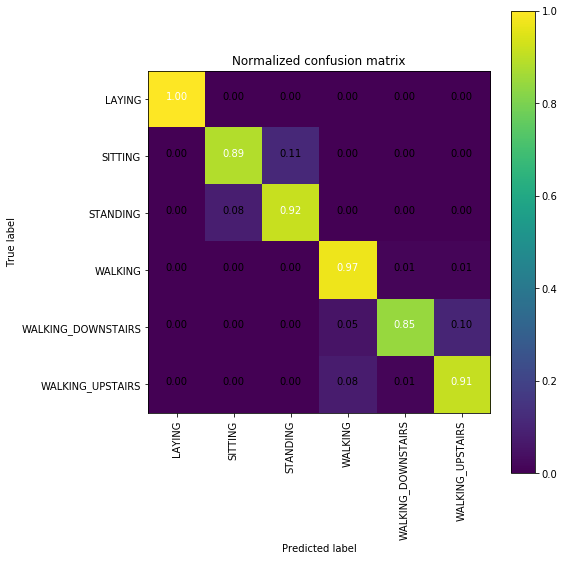

In [43]:
'''Confusionmatrix is for the random forest classifier'''
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(cm, normalize=True, title='Normalized confusion matrix')
plt.show()